# Model Parameters, Bootstrapping for Model Interpretation in Practice

## What is model evaluation about?

- Classification of uncertainties
    - In the model (i.e. model parameters)
    - Resulting uncertainties in predictions
    - Resulting uncertainties in performance measures

## Where do the uncertainties come from?

- Data
    - Variance (from small data sets)
    - Bias (often also from small data sets)
    - But, remember the $\sqrt{N}$ law!
- Model
    - Inability to capture the nature of the data (i.e. non-linear data)
- Modeling process
    - E.g. choice of train, test, and *validation* sets

## How to deal with them?

- Cross-validation (dependence of performance on train/test choice)
    - Extreme case: Leave-one-out CV
- Bootstrapping
    - Swiss army knife
- Direct calculation of errors on model parameters (in some cases)
    - E.g. linear regression
- Many models can predict "probabilities"
    - E.g. Logistic regression, decision trees

# Business Impact of (Un)certainties
---

### Transitioning from Point Estimates to Distribution Estimates

---

**Point Estimates:**
- Single-value predictions, such as accuracy (`Acc`) and true positive rate (`TPR`), simplify complex models.
- Example: An accuracy of `Acc = 95%` for a demand forecast model.

**Towards Distributions:**
- Estimate distributions to obtain measures like standard deviation (`σ`) or confidence intervals.
- E.g. for linear models, `β ~ N(μ, σ²)`, where `μ` and `σ²` are the mean and variance of the parameter estimates.

**Business Relevance:**
- In e.g. commodity trading, a price model might output not just a point estimate but also a range, `P ± δ`, considering the volatility.
- In predictive maintenance, we might be interested in the confidence in a predicted failure.

---

## Impact on Business Decisions

### Embracing Uncertainty in Predictive Models

---

**Understanding Distributions:**
- Risk is not a single number: `Risk(P) = ∫ Probability(Price) * Loss(Price) dPrice`.
- Business decisions require understanding the tail risks and full distribution of outcomes.

**Price Forecasting Example:**
- Instead of `Price = $70`, use `Price ~ N($70, $5²)` to denote a normal distribution with a mean of $70 and a standard deviation of $5.
- Traders can use `VaR` (Value at Risk) to gauge potential losses: `VaR = μ - z * σ` for a confidence level `z`.

---

## Model Adoption in Business Environments

### The Role of Interpretability and Trust

---

**Interpretable Models & Distributions:**
- Feature importance might show `Feature₁ > Feature₂` as point estimates but distributions tell us more about stability and uncertainty.

**Building Trust with Distributions:**
- Confidence in parameters: `β₁ ± SE(β₁)` where `SE` is the standard error.
- Trust comes from understanding the range `β₁` could realistically take.

**Predictive Maintenance Example:**
- Time-to-failure predictions not as `T = 180 days` but as a probability distribution, `T ~ Exp(λ)`.
- Allows for a probabilistic understanding of failure and optimized scheduling.

---

## Implementing Bootstrap Methods

### Statistical Rigor in Oil & Gas Predictive Analytics

---

**The Bootstrap Principle:**
- Provides a non-parametric approach to statistical inference without relying on large sample assumptions or normality.

**Bootstrap Algorithm:**
1. Draw a sample (with replacement) of size `n` from the data set (of size `n`), creating a bootstrap sample.
2. Compute the statistic `θ*` of interest (e.g., mean, median, variance) from the bootstrap sample.
3. Repeat steps 1 and 2 `B` times to form a bootstrap distribution of `θ*`.

**Formally, for a statistic θ:**
```plaintext
θ* = (1/B) Σ θ*(b), where b = 1, 2, ..., B
```
- And the standard error (SE) can be estimated as:
```plaintext
SE(θ*) = sqrt((1/(B-1)) Σ (θ*(b) - θ*)²)
```

**Recommendations for Use:**
- Bootstrapping is especially valuable when the theoretical distribution of a statistic is unknown or complex.
- Commonly used sample sizes for `B` range from 1,000 to 10,000, balancing computational cost with estimation accuracy.

---

## Case Study: Reservoir Volume Estimation

### Bootstrap Method in Resource Quantification

---

**Context:**
- Accurate estimation of recoverable volume in a reservoir (`V`) is crucial for financial planning and operational strategy.

**Applying the Bootstrap:**
- **Data Collection:** Obtain a sample of reservoir volume estimates from geological and seismic data.
- **Bootstrap Resampling:** Generate `B = 10,000` bootstrap samples from the original volume data.
- **Volume Estimate:** Calculate the mean volume `V*` for each bootstrap sample.
- **Confidence Interval:** Estimate a 95% confidence interval for `V` using the bootstrap distribution.

**Bootstrap Confidence Interval:**
- `CI(V) = [V*₍ₐ₎, V*₍ᵦ₎]`, where `V*₍ₐ₎` is the 2.5th percentile and `V*₍ᵦ₎` is the 97.5th percentile of the bootstrap estimates.

**When to Use Bootstrapping:**
- When the sample size is moderate to large, ensuring enough unique samples for resampling.
- In complex models where the theoretical distribution is intractable or not well-defined.

**Business Advantages:**
- Provides a data-driven approach to quantify the uncertainty in reservoir size.
- Assists in strategic decision-making regarding exploration and development investments.

---

## Case Study - Bootstrap Application in Oil & Gas Trading

---

**Bootstrap for Trading Strategies:**
- Estimate the outcome distribution of a trading strategy: `Profit ~ Bootstrap(D₁, D₂, ..., Dn)`.
- Determine the percentile of outcomes to evaluate strategy risk.

**Business Case Benefits:**
- Improved decision-making through empirical confidence intervals: `90% CI = [P₅₀₀ - 1.645 * SE, P₅₀₀ + 1.645 * SE]`.
- Strategies can be ranked and selected based on the distribution of returns.

**Key Takeaways:**
- Model predictions backed by empirical distributions inform better business strategies.
- Responsible data science enhances risk assessment and strategic decision-making.

---

In [2]:
import pandas as pd
df = pd.read_csv('data/income_data.csv')

<Axes: xlabel='occupation'>

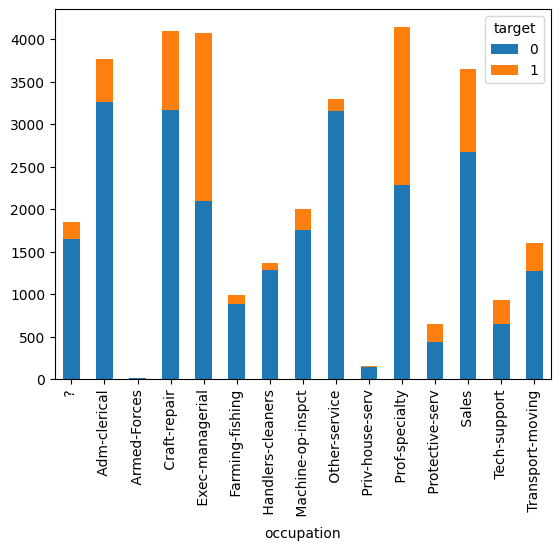

In [6]:
df.groupby(['occupation', 'target']).size().unstack().plot.bar(stacked=True)

<Axes: xlabel='occupation'>

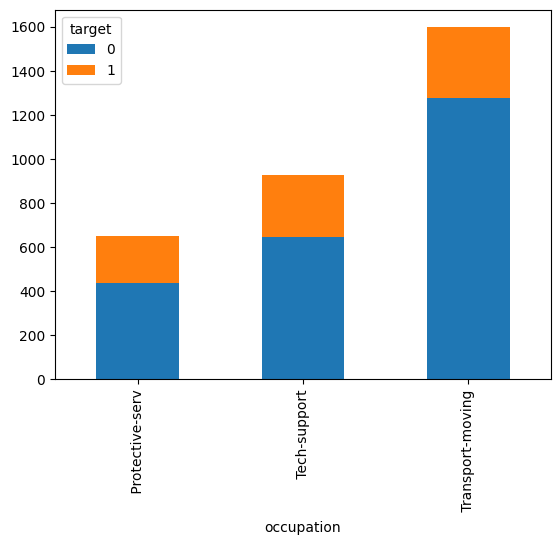

In [7]:
df_simple = df[df['occupation'].isin([' Transport-moving', ' Protective-serv',
                                      ' Tech-support'])]
df_simple.groupby(['occupation', 'target']).size().unstack().plot.bar(stacked=True)

In [8]:
df_simple.groupby('occupation')['target'].mean()

occupation
 Protective-serv     0.325116
 Tech-support        0.304957
 Transport-moving    0.200376
Name: target, dtype: float64

# Bootstrap

In [9]:
N = df_simple.shape[0]
# Draw ONE bootstrap sample
df_simple.sample(N, replace=True)\
   .groupby('occupation')['target'].mean()

occupation
 Protective-serv     0.350238
 Tech-support        0.301502
 Transport-moving    0.200497
Name: target, dtype: float64

In [12]:
def mk_sample():
    return df_simple.sample(N, replace=True)\
      .groupby('occupation')['target'].mean()

In [13]:
mk_sample()

occupation
 Protective-serv     0.323671
 Tech-support        0.320041
 Transport-moving    0.206349
Name: target, dtype: float64

In [14]:
bss_df = pd.DataFrame([mk_sample() for _ in range(5_000)])

<Axes: ylabel='Frequency'>

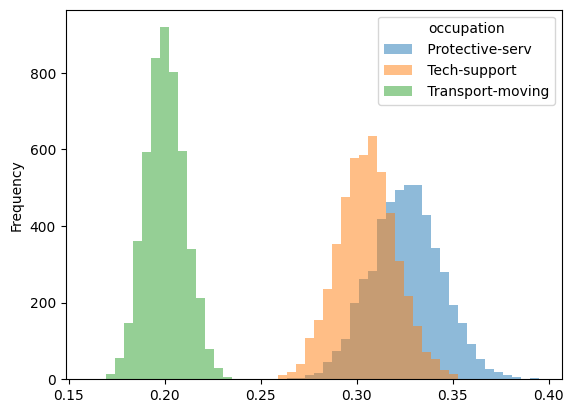

In [16]:
bss_df.plot.hist(bins=50, alpha=0.5)

# Binomial Model

In [17]:
params = pd.DataFrame({
    'N': df_simple.groupby('occupation').size(),
    'k': df_simple.groupby('occupation')['target'].sum()
})

In [18]:
params

,N,k
occupation,,
Protective-serv,649,211
Tech-support,928,283
Transport-moving,1597,320


In [19]:
from scipy.stats import binom

In [26]:
binomial = params.apply(
    lambda x: binom.rvs(x['N'], x['k']/x['N'],
                        size=5_000)/x['N'], axis=1, result_type='expand')

In [24]:
binomial.T

occupation,Protective-serv,Tech-support,Transport-moving
0,0.314330,0.306034,0.190357
1,0.314330,0.300647,0.197245
2,0.348228,0.289871,0.190983
3,0.326656,0.316810,0.205385
4,0.320493,0.297414,0.205385
...,...,...,...
4995,0.295840,0.304957,0.180964
4996,0.320493,0.306034,0.192862
4997,0.298921,0.311422,0.200376
4998,0.311248,0.313578,0.179712


<Axes: ylabel='Frequency'>

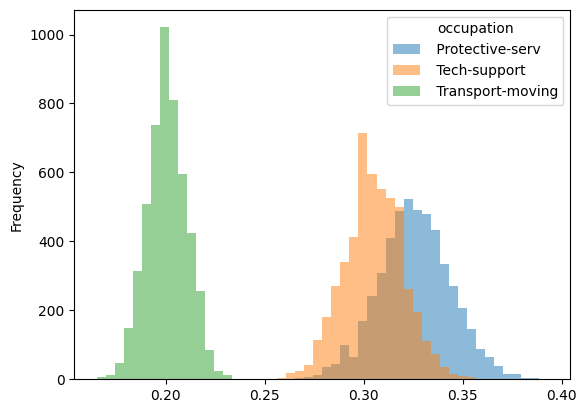

In [27]:
binomial.T.plot.hist(bins=50, alpha=0.5)

<Axes: ylabel='Frequency'>

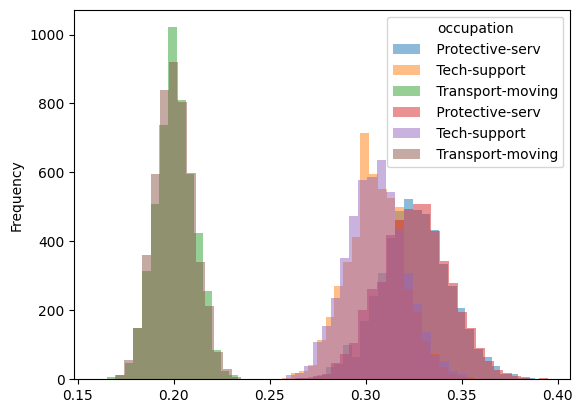

In [28]:
ax = binomial.T.plot.hist(bins=50, alpha=0.5)
bss_df.plot.hist(bins=50, alpha=0.5, ax=ax)

## Bootstrapping Model Performance Metrics

In [32]:
cat_features = ['sex','education', 'occupation']
cont_features = ['age', 'hours-per-week']

X = df[cont_features].join(pd.get_dummies(df[cat_features],
                                          drop_first=True))
y = df['target']
N = len(y)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

In [35]:
idx = np.random.choice(N, N, replace=True)
Xtr, Xte, ytr, yte = train_test_split(X.iloc[idx], y.iloc[idx])
model = DecisionTreeClassifier().fit(Xtr, ytr)
confusion_matrix(yte, model.predict(Xte)).ravel()

array([5669,  464,  772, 1236])

In [34]:
def get_bss_cm(X, y):
    idx = np.random.choice(N, N, replace=True)
    Xtr, Xte, ytr, yte = train_test_split(X.iloc[idx], y.iloc[idx])
    model = DecisionTreeClassifier().fit(Xtr, ytr)
    return confusion_matrix(yte, model.predict(Xte))

In [36]:
eval_df = pd.DataFrame(
    [get_bss_cm(X, y).ravel() for _ in range(200)],
    columns=["tn", "fp", "fn", "tp"]
)

In [37]:
eval_df

,tn,fp,fn,tp
0,5699,534,680,1228
1,5689,478,741,1233
2,5665,523,760,1193
3,5729,490,690,1232
4,5741,500,675,1225
...,...,...,...,...
195,5668,534,704,1235
196,5638,502,763,1238
197,5656,537,729,1219
198,5626,558,726,1231


<Axes: ylabel='Frequency'>

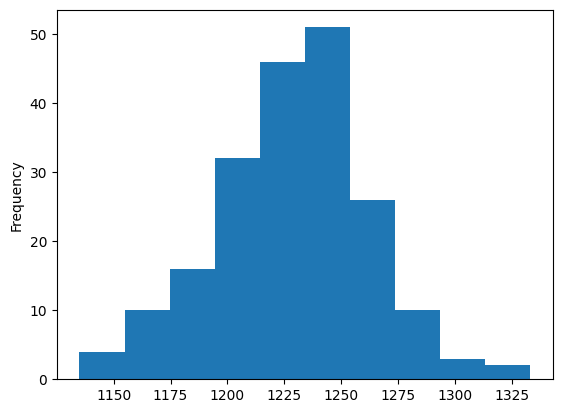

In [39]:
eval_df['tp'].plot.hist()

In [41]:
eval_df.sum(axis=1)

0      8141
1      8141
2      8141
3      8141
4      8141
       ... 
195    8141
196    8141
197    8141
198    8141
199    8141
Length: 200, dtype: int64

<Axes: ylabel='Frequency'>

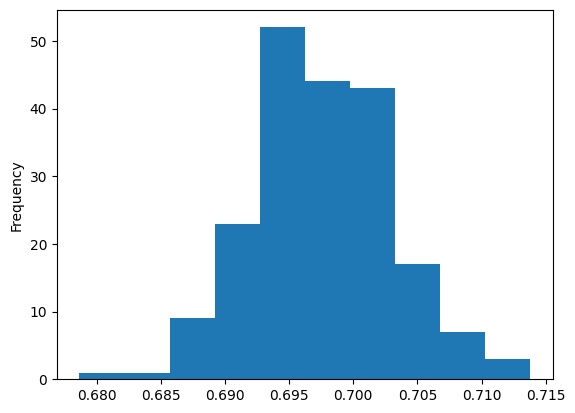

In [46]:
(eval_df/8141)['tn'].plot.hist()

In [50]:
def get_bss_feature_imp(X, y):
    idx = np.random.choice(N, N, replace=True)
    Xtr, Xte, ytr, yte = train_test_split(X.iloc[idx], y.iloc[idx])
    model = DecisionTreeClassifier().fit(Xtr, ytr)
    return model.feature_importances_

In [51]:
get_bss_feature_imp(X, y)

array([4.03108328e-01, 2.19306907e-01, 4.82589132e-02, 4.35897120e-03,
       3.32944956e-03, 1.35390495e-03, 2.04174471e-03, 3.54258321e-03,
       4.20991491e-03, 9.95320176e-03, 1.36070591e-02, 2.57588410e-02,
       9.11181161e-03, 3.70872145e-02, 1.14702335e-02, 0.00000000e+00,
       1.10908251e-02, 2.12308732e-02, 9.59617641e-03, 5.49057105e-05,
       1.29875563e-02, 3.70606426e-02, 7.78520596e-03, 5.30864953e-03,
       6.16452702e-03, 8.33185081e-03, 2.42584575e-04, 4.00177715e-02,
       7.66785050e-03, 1.61144936e-02, 1.07458711e-02, 9.10113708e-03])

In [49]:
X.columns

Index(['age', 'hours-per-week', 'sex_ Male', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving'],
      dtype='object')

In [54]:
fi = pd.DataFrame(
    [get_bss_feature_imp(X, y) for _ in range(200)],
    columns=X.columns
)

In [55]:
fi.head()

,age,hours-per-week,sex_ Male,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,0.402133,0.198574,0.063780,0.006325,0.003204,0.001843,0.001369,0.004546,0.002840,0.011631,...,0.004460,0.004445,0.004778,0.007371,0.000427,0.056170,0.006795,0.019279,0.009942,0.007223
1,0.405149,0.197073,0.060246,0.005529,0.002730,0.000844,0.001481,0.004371,0.002705,0.011149,...,0.006466,0.005534,0.005777,0.008236,0.000237,0.054845,0.007393,0.025845,0.007527,0.008191
2,0.413158,0.218226,0.046258,0.005252,0.002900,0.000906,0.002615,0.003510,0.001552,0.009968,...,0.006338,0.005444,0.008008,0.009757,0.000050,0.038923,0.010372,0.022026,0.009526,0.006913
3,0.396575,0.224266,0.042904,0.005394,0.002681,0.000918,0.002285,0.005382,0.002680,0.010277,...,0.007534,0.005632,0.007586,0.007957,0.000569,0.043658,0.007601,0.019174,0.012643,0.012258
4,0.396485,0.186156,0.062479,0.005509,0.002203,0.001113,0.001833,0.005402,0.002869,0.011330,...,0.004535,0.006728,0.005695,0.006939,0.000494,0.058951,0.008741,0.014085,0.008948,0.008699


In [56]:
import seaborn as sns

In [64]:
# get top 10 features
top_cats = fi.mean().sort_values().tail(10).index

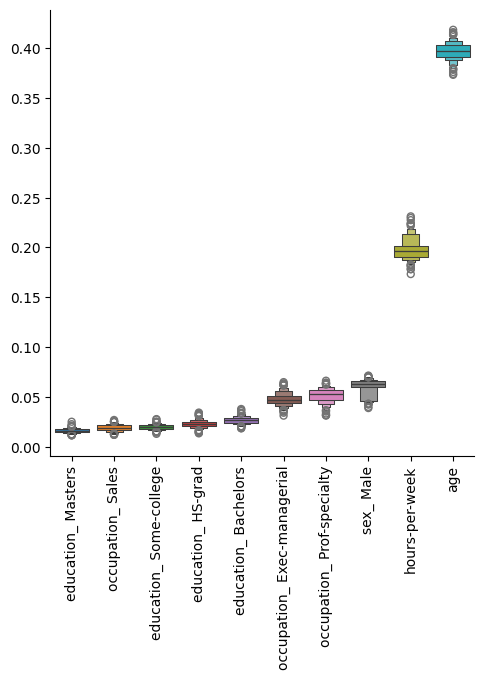

In [67]:
g = sns.catplot(fi[top_cats], kind='boxen')
g.set_xticklabels(rotation=90)